### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [3]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt

1. display 5 columns from dataset

In [59]:
#1

df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv',)
df.head(5)

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [5]:
#2
df.info()

#conclusion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [11]:
#3a
print("admission")
print(df['admission'].value_counts(dropna=False))

admission
Deny        5194
Admit        900
Waitlist     100
Name: admission, dtype: int64


In [10]:
#3b
print("race")
print(df['race'].value_counts(dropna=False))

race
Other       2079
White       1456
Asian       1147
Black        916
Hispanic     596
Name: race, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [60]:
#4
df['admission'].fillna('Deny', inplace=True)
df['race'].fillna('Other', inplace=True)

5. recheck missing value

In [13]:
#5
df.isna().sum()

application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64

6. drop application_id column

In [61]:
# 6
df = df.drop('application_id',axis=1)
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,Female,True,3.30,Business,Other,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny


7. show describe column and conclude what the insight is from that column

In [15]:
#7
df.describe()

#conclusion


,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

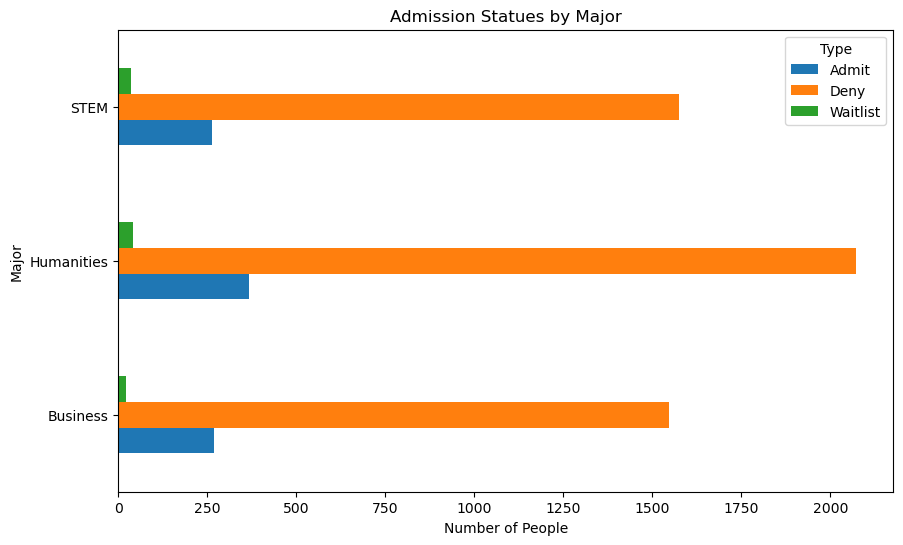

from this data we can see that the majority of all applicants are not accepted
from all 3 majors, most are denied while some become waitlist


In [49]:
#8
count_type_by_quality = df.groupby(['major','admission'])['admission'].count().unstack()
count_type_by_quality.plot (kind='barh',figsize=(10,6))

plt.title('Admission Statues by Major')
plt.ylabel('Major')
plt.xlabel('Number of People')
plt.legend(title='Type')
plt.show()

print("from this data we can see that the majority of all applicants are not accepted")
print("from all 3 majors, most are denied while some become waitlist")


9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

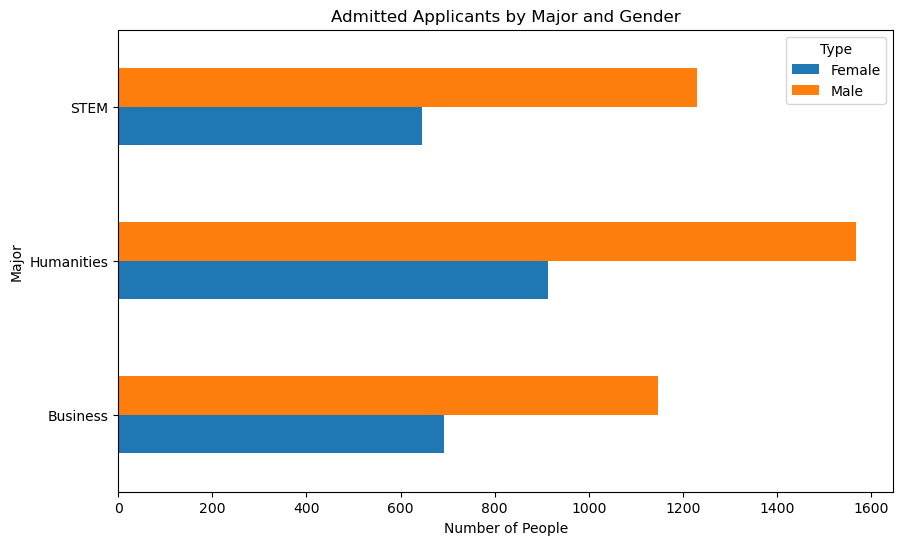

from this data we can see that there is a disparity in gender on all majors.
we can observe that there is roughly twice the amount of males as there are in female in STEM
although the gab seems to be lessening in Business and Humanities


In [44]:
#9
count_type_by_quality = df.groupby(['major','gender'])['gender'].count().unstack()
count_type_by_quality.plot (kind='barh',figsize=(10,6))

plt.title('Admitted Applicants by Major and Gender')
plt.xlabel('Number of People')
plt.ylabel('Major')
plt.legend(title='Type')
plt.show()

print("from this data we can see that there is a disparity in gender on all majors.")
print("we can observe that there is roughly twice the amount of males as there are in female in STEM")
print("although the gab seems to be lessening in Business and Humanities")


10. create your own insightful visualization and explain it in at least 2 sentences

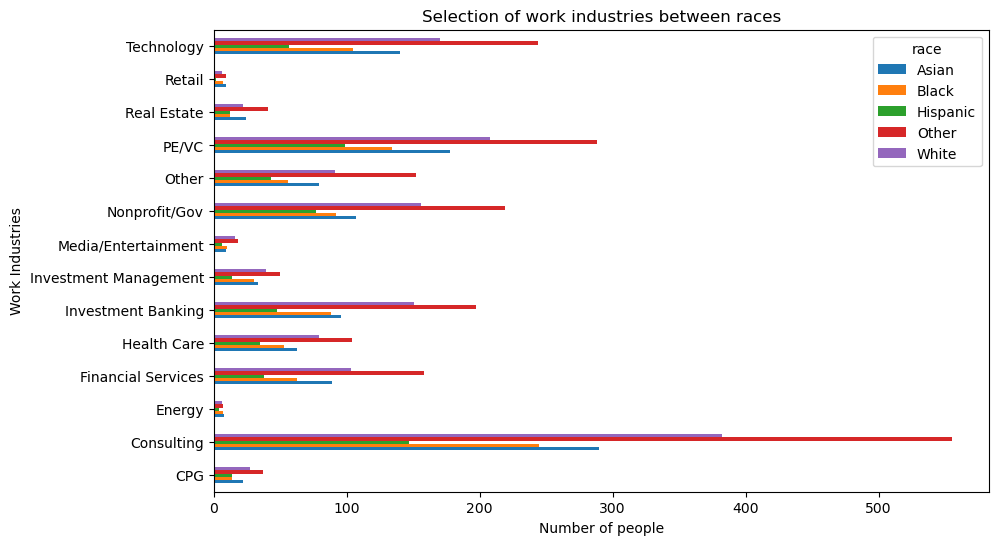

from the data we can see that, excluding Others, there is a difference in what each race selectes in work industries.
one of the examples is that while the largest majority is whites, some industries are more orientated towards other races
for example, retail & energy are more balance


In [45]:
#10
count_type_by_quality = df.groupby(['work_industry','race'])['race'].count().unstack()
count_type_by_quality.plot (kind='barh',figsize=(10,6))

plt.title('Selection of work industries between races')
plt.xlabel('Number of people')
plt.ylabel('Work Industries')
plt.legend(title='race')
plt.show()

print("from the data we can see that, excluding Others, there is a difference in what each race selectes in work industries.")
print("one of the examples is that while the largest majority is whites, some industries are more orientated towards other races")
print("for example, retail & energy are more balance")

11. create your own insightful visualization and explain it in at least 2 sentences

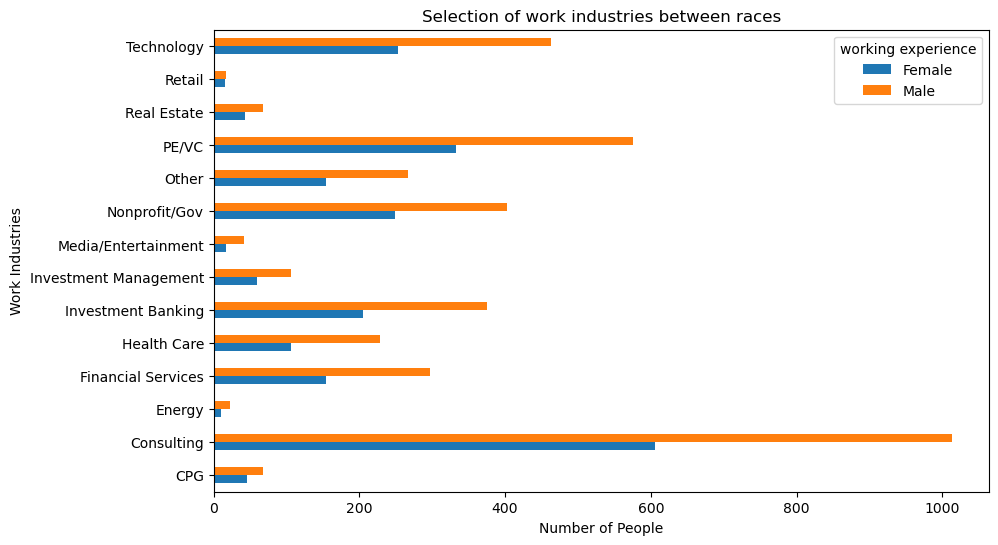

from the data we can see that, while the majority of industries are males, some are less dominate than others.
an example of an almost equal ratio is retails, and another one that is near is real estates


In [47]:
#11
count_type_by_quality = df.groupby(['work_industry','gender'])['gender'].count().unstack()
count_type_by_quality.plot (kind='barh',figsize=(10,6))

plt.title('Selection of work industries between races')
plt.xlabel('Number of People')
plt.ylabel('Work Industries')
plt.legend(title='working experience')
plt.show()

print("from the data we can see that, while the majority of industries are males, some are less dominate than others.")
print("an example of an almost equal ratio is retails, and another one that is near is real estates")

12. encode categorical columns and display the results

In [149]:


#12a
#encode X

en_df = df.copy()
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Fit and transform the gender column, replacing it with encoded values
en_df['gender'] = le.fit_transform(en_df['gender'])
en_df['international'] = le.fit_transform(en_df['international'])
en_df['major'] = le.fit_transform(en_df['major'])
en_df['race'] = le.fit_transform(en_df['race'])
en_df['work_industry'] = le.fit_transform(en_df['work_industry'])


en_df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,Deny
2,0,1,3.30,0,3,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,Deny
4,1,0,3.35,2,2,590.0,5.0,1,Deny


In [150]:
#12b
#encode y
en_df['admission'] = le.fit_transform(en_df['admission'])
en_df.head()


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,1
2,0,1,3.30,0,3,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,1
4,1,0,3.35,2,2,590.0,5.0,1,1


13. create a heatmap to see the correlation and explain the conclusion

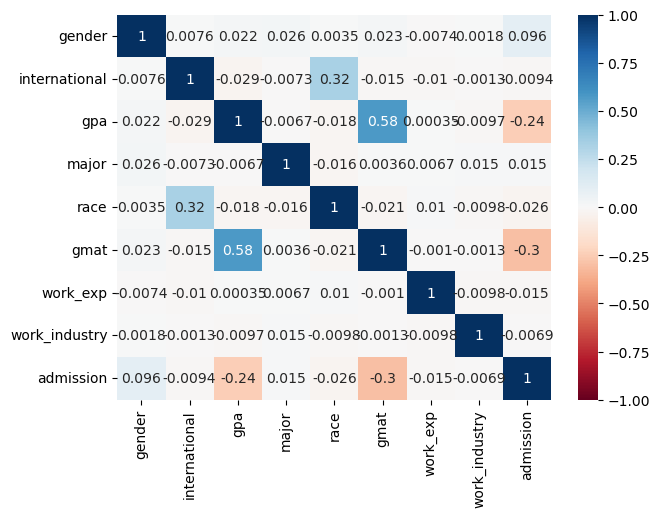

The things that are affecting admission rate is both gpa score and gmat.
other factors like gender, race, etc dont really have a significant effect


In [152]:
#13
import seaborn as sns

plt.subplots(figsize=(7,5))
sns.heatmap(en_df.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()
#Conclusion
print('The things that are affecting admission rate is both gpa score and gmat.')
print('other factors like gender, race, etc dont really have a significant effect')

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [148]:
#Challenge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics 


y = en_df['admission']
X = en_df[[
    'gender',
    'international',	
    'gpa',
    'major',
    'gmat',
    'work_exp',
    'work_industry'
    ]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the model
clf = clf.fit(X_train,y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

average_gpa = en_df['gpa'].sum()/en_df['gpa'].count()


# Asian = 0, Finance = 3, Business technically is for entrepreneurs
prediction = clf.predict([[0,0,average_gpa,0,580,2,3]])

predicted_role = ""
if prediction == 0:
    predicted_role = "Accepted"
elif prediction == 1:
    predicted_role = "Denied"
elif prediction == 2:
    predicted_role = "Waitlist"



print("Lisa is likely to be : "+str(predicted_role))

Accuracy: 0.7675544794188862
Lisa is likely to be : Denied


c:\Users\Lolz\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
